In [22]:
!sudo rm -r /tmp/*

In [23]:
bandas = ["LL","LH","HL","HH"]
imagen ="{:03d}".format(3)
valores_q_step = [8,16,20,55,60,80,100,200,300,512,1028] 
tipos_cuantificacion = ["midrise"]

In [24]:
q_step=32  
predictor=2  

for q_step in valores_q_step:
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/stockholm/{imagen}.png /tmp/{q_step}/original/   
    !mkdir /tmp/{q_step}/dwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/dwt/  
    !cd src/ && python3 -O DWT.py -p /tmp/{q_step}/dwt/ -i {imagen}
    !ls /tmp/{q_step}/dwt/
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo} 
        print("Step : "+str(q_step))
        for banda in bandas: 
            print("Banda : "+str(banda))
            !mkdir /tmp/{q_step}/{tipo}/{banda}
            !cp /tmp/{q_step}/dwt/*.png /tmp/{q_step}/{tipo}/{banda}
            !rm -r /tmp/{q_step}/{tipo}/{banda}/{banda}{imagen}.png
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/dwt/{banda}{imagen}.png -o /tmp/{q_step}/{tipo}/{banda}/{banda}{imagen}.png -q {q_step}  
            !mkdir /tmp/{q_step}/{tipo}/{banda}/inversas  &&  cp /tmp/{q_step}/{tipo}/{banda}/* /tmp/{q_step}/{tipo}/{banda}/inversas  
            !cd src/ && python3 -O DWT.py -p /tmp/{q_step}/{tipo}/{banda}/inversas/ -b  -i {imagen}

003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 8
Banda : LL
cp: -r not specified; omitting directory '/tmp/8/midrise/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/8/midrise/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/8/midrise/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/8/midrise/HH/inversas'
003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 16
Banda : LL
cp: -r not specified; omitting directory '/tmp/16/midrise/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/16/midrise/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/16/midrise/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/16/midrise/HH/inversas'
003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 20
Banda : LL
cp: -r not specified; omitting directory '/tmp/20/midrise/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/20/midrise/LH/inversas'

In [25]:
!cat suma.py


2465309.0
2468318.0
2466954.0
2586468.0
2363175.0
2386557.0
2415172.0
2585367.0
2347248.0
2369719.0
2408916.0
2585296.0
2204914.0
2344557.0
2401453.0
2585315.0
2192416.0
2343901.0
2401310.0
2585315.0
2162035.0
2342919.0
2401206.0
2585315.0
2127219.0
2342731.0
2401173.0
2585315.0
2038316.0
2342641.0
2401173.0
2585315.0
2002999.0
2342641.0
2401173.0
2585315.0
1959413.0
2247126.0
2283935.0
2479958.0
1968342.0
2342998.0
2401570.0
2585673.0
{'LL': [[2465309.0, 1.3026123046875], [2363175.0, 3.335698445638021], [2347248.0, 4.8715806749131945], [2204914.0, 34.47860209147135], [2192416.0, 41.307908121744795], [2162035.0, 80.6292002360026], [2127219.0, 128.54580722384983], [2038316.0, 550.8373324924045], [2002999.0, 1376.9866611056857], [1959413.0, 5388.257095336914], [1968342.0, 32246.74918077257]], 'LH': [[2468318.0, 2.7027320014105904], [2386557.0, 9.106888495551216], [2369719.0, 14.608125813802083], [2344557.0, 151.94849887424044], [2343901.0, 185.75043436686198], [2342919.0, 356.9074174669

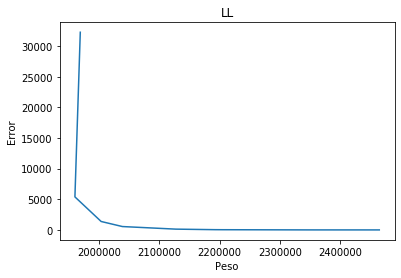

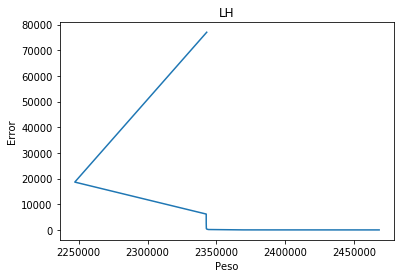

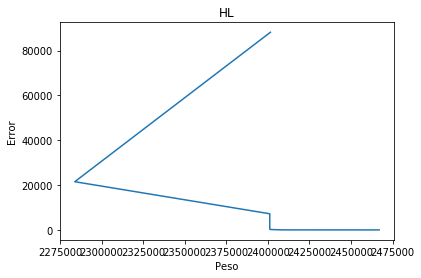

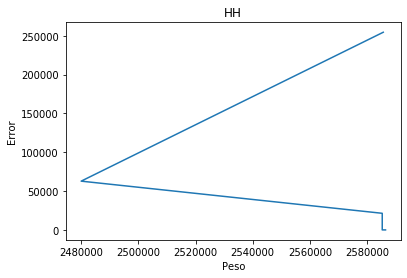

In [27]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
resultado_total = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}
s = Sumando()
imagen = 3
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:     
        for banda in ["LL", "LH", "HL", "HH"]:
            pesos = s.GetPesosSubbandas(str(tipo), str(q_step),banda,imagen)
            print(pesos)
            MSE = 0.0
            MSE += s.GetMSESubbanda(tipo,imagen,q_step,banda)
            resultado_total[banda].append([pesos,MSE]) 
print(resultado_total)
plt.figure()
diccionario = resultado_total
for tipo in diccionario:
    plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
    plt.ylabel('Error')
    plt.xlabel('Peso')
    plt.title(tipo)
    plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Lists of operational RD (Rate/Distortion) points
print(resultado_total)
LL = resultado_total["LL"]
LH = resultado_total["LH"]
HL = resultado_total["HL"]
HH = resultado_total["HH"]

{'LL': [[2468285.0, 1.3053460015190972], [2366193.0, 3.3348507351345487], [2349731.0, 4.866026814778646], [2207678.0, 34.43072645399305], [2195376.0, 41.17566121419271], [2165033.0, 80.52439846462674], [2129621.0, 128.32088080512153], [2040173.0, 550.9065687391493], [2005373.0, 1378.6788814968534], [1961507.0, 5395.475536092123], [1970444.0, 32276.949439493816]], 'LH': [[2470981.0, 2.70525885687934], [2388912.0, 9.060213216145833], [2371582.0, 14.535821194118924], [2346680.0, 151.55927124023438], [2346008.0, 185.28851453993056], [2345023.0, 356.235011461046], [2344893.0, 586.6770918104384], [2344769.0, 2634.835060289171], [2344769.0, 6176.719656711154], [2249353.0, 18625.59763285319], [2345129.0, 76982.49168362087]], 'HL': [[2469631.0, 2.69366455078125], [2417248.0, 10.001346164279514], [2411090.0, 16.913261244032118], [2403294.0, 188.41103888617621], [2403180.0, 230.5309332953559], [2403100.0, 438.5846394856771], [2403059.0, 714.4363250732422], [2403055.0, 3111.9588494194877], [240305

In [15]:
# Slopes of each pair of points
total = []
for sub in resultado_total:
    slopes1 = [] 
    curve1 = resultado_total[sub]
    for i in range(len(curve1)-1):
        slope = (curve1[i][1]-curve1[i+1][1])/(curve1[i+1][0]-curve1[i][0])
        slopes1.append((slope, curve1[i+1][0], sub))
    total = total + slopes1
print(total)

[(1.9879174995253803e-05, 2366193.0, 'LL'), (9.301276148973985e-05, 2349731.0, 'LL'), (0.00020812442989035364, 2207678.0, 'LL'), (0.0005482795285481755, 2195376.0, 'LL'), (0.0012967978528963529, 2165033.0, 'LL'), (0.0013497255828672425, 2129621.0, 'LL'), (0.00472437268506873, 2040173.0, 'LL'), (0.02378656071142828, 2005373.0, 'LL'), (0.09156970443157045, 1961507.0, 'LL'), (-3.007885633143302, 1970444.0, 'LL'), (7.743428528758109e-05, 2388912.0, 'LH'), (0.0003159612220411478, 2371582.0, 'LH'), (0.005502507832548207, 2346680.0, 'LH'), (0.0501923263388336, 2346008.0, 'LH'), (0.17354974306712226, 2345023.0, 'LH'), (1.7726313873030182, 2344893.0, 'LH'), (16.51740297160268, 2344769.0, 'LH'), (-inf, 2344769.0, 'LH'), (0.1304695017202779, 2249353.0, 'LH'), (-0.6093060270920447, 2345129.0, 'LH'), (0.00013950483197789864, 2417248.0, 'HL'), (0.001122428561181001, 2411090.0, 'HL'), (0.021998175685241674, 2403294.0, 'HL'), (0.36947275797526047, 2403180.0, 'HL'), (2.6006713273790147, 2403100.0, 'HL'

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [16]:
sorted_lists = sorted(total, key=lambda tup: tup[0])[::-1]
print(sorted_lists)

[(599.3806310865614, 2403055.0, 'HL'), (16.51740297160268, 2344769.0, 'LH'), (6.728089892379637, 2403059.0, 'HL'), (2.6006713273790147, 2403100.0, 'HL'), (1.7726313873030182, 2344893.0, 'LH'), (0.39300344850588376, 2482335.0, 'HH'), (0.37123288896348744, 2587716.0, 'HH'), (0.36947275797526047, 2403180.0, 'HL'), (0.17354974306712226, 2345023.0, 'LH'), (0.1304695017202779, 2249353.0, 'LH'), (0.1218863983608736, 2285796.0, 'HL'), (0.09156970443157045, 1961507.0, 'LL'), (0.0501923263388336, 2346008.0, 'LH'), (0.03328132617696594, 2587796.0, 'HH'), (0.02378656071142828, 2005373.0, 'LL'), (0.021998175685241674, 2403294.0, 'HL'), (0.005502507832548207, 2346680.0, 'LH'), (0.00472437268506873, 2040173.0, 'LL'), (0.0013497255828672425, 2129621.0, 'LL'), (0.0012967978528963529, 2165033.0, 'LL'), (0.001122428561181001, 2411090.0, 'HL'), (0.0005482795285481755, 2195376.0, 'LL'), (0.0003159612220411478, 2371582.0, 'LH'), (0.00020812442989035364, 2207678.0, 'LL'), (0.00013950483197789864, 2417248.0, 

In [21]:
R = 15908500# Bit budget
spent = 0
i = 0
optimal = []
while True:
    spent += sorted_lists[i][1]
    if spent < R:
        optimal.append(sorted_lists[i])
    else:
        break
    i += 1
print("Optimal RD points =", optimal)
br = sum([i[1] for i in optimal])
print("bit-rate =", br)

Optimal RD points = [(599.3806310865614, 2403055.0, 'HL'), (16.51740297160268, 2344769.0, 'LH'), (6.728089892379637, 2403059.0, 'HL'), (2.6006713273790147, 2403100.0, 'HL'), (1.7726313873030182, 2344893.0, 'LH'), (0.39300344850588376, 2482335.0, 'HH')]
bit-rate = 14381211.0
